# Bagging:装袋模型
- 首先对训练数据集进行多次采样，保证每次得到的采样数据都是不同的
- 分别训练多个模型，例如树模型
- 预测时需得到所有模型结果再进行集成
- bagging策略是并行训练策略,相对boosting更加花费时间

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier,BaggingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.datasets import load_wine,load_digits,load_diabetes
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score#交叉验证

In [7]:
wine = load_wine()
 
wine.data
wine.target

X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=42)

In [9]:
tree_clf=DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train,y_train)
y_pred0 = tree_clf.predict(X_test)
accuracy_score(y_test,y_pred0)

0.9555555555555556

决策树与装袋模型比较可以看到,拟合效果出现很大的优化

In [10]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                  n_estimators = 500,
                  max_samples = 100,
                  bootstrap = True,
                  n_jobs = -1,
                  random_state = 42
)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

## 绘制决策树与装袋模型的决策边界

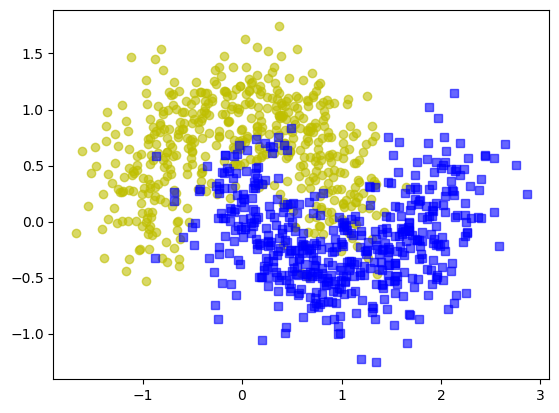

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',alpha = 0.6)

In [17]:
tree_clf=DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train,y_train)
y_pred0 = tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred0))

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                  n_estimators = 500,
                  max_samples = 100,
                  bootstrap = True,
                  n_jobs = -1,
                  random_state = 42
)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.892
0.916


In [41]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model,X,y):
    x_min,x_max=min(X[:,0])-0.3,max(X[:,0])+0.3
    y_min,y_max=min(X[:,1])-0.3,max(X[:,1])+0.3
    x0,x1=np.meshgrid(
        np.linspace(x_min,x_max,100),
        np.linspace(y_min,y_max,100)
    )
    X_new=np.c_[x0.ravel(),x1.ravel()]
    zz=model.predict(X_new).reshape(x0.shape)
    custom_cmap = ListedColormap(['#fafab0','#a0faa0'])
    plt.contour(x0,x1,zz,cmap=plt.cm.brg)#绘制边界
    cs=plt.contourf(x0,x1,zz,cmap=custom_cmap)#绘制区域
    plt.scatter(X[:,0],X[:,1],c=y,cmap=custom_cmap,alpha=0.6,edgecolors='k')

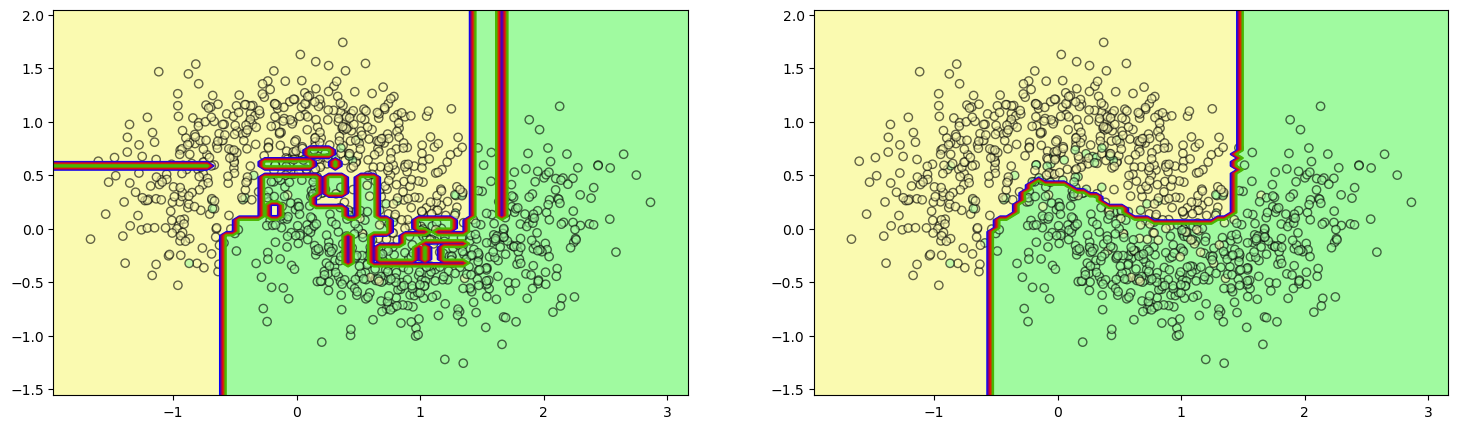

In [42]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)

plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.show()

### 从图上看,明显Bagging策略的效果更好

# 随机森林

In [43]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.916


### 交叉验证

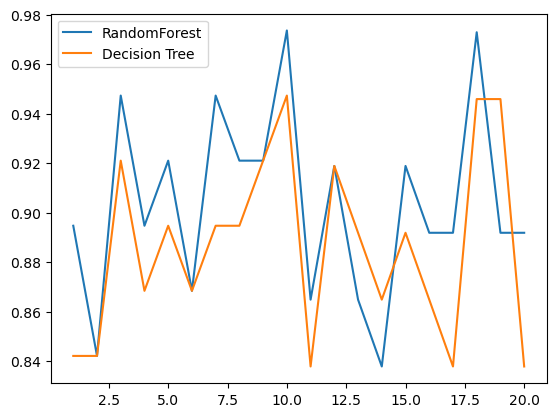

array([0.84210526, 0.84210526, 0.92105263, 0.86842105, 0.89473684,
       0.86842105, 0.89473684, 0.89473684, 0.92105263, 0.94736842,
       0.83783784, 0.91891892, 0.89189189, 0.86486486, 0.89189189,
       0.86486486, 0.83783784, 0.94594595, 0.94594595, 0.83783784])

In [48]:
#随机森林与单棵决策树对比
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X_train,y_train,cv=20)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X_train,y_train,cv=20)
 
plt.plot(range(1,21),rfc_s,label = "RandomForest")
plt.plot(range(1,21),clf_s,label = "Decision Tree")
plt.legend()
plt.show()
clf_s#20折交叉验证,那么会得到20个预测效果

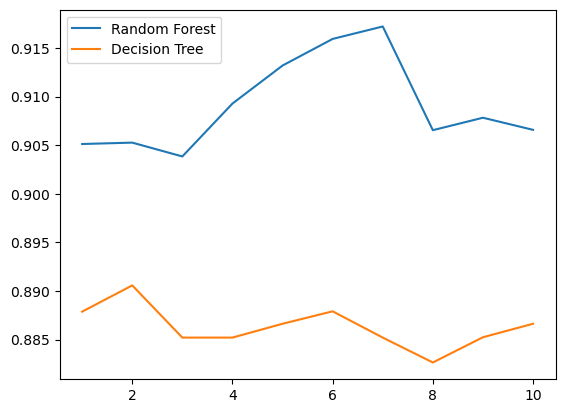

In [49]:
#取每次交叉验证的平均,然后遍历10次
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X_train,y_train,cv=20).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X_train,y_train,cv=20).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,21),rfc_l,label = "Random Forest")
plt.plot(range(1,21),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

波动趋势近似,再次验证了单个决策树的准确率越高，随机森林的准确率也会越高

### 验证随机森林树个数的重要性

0.916 43


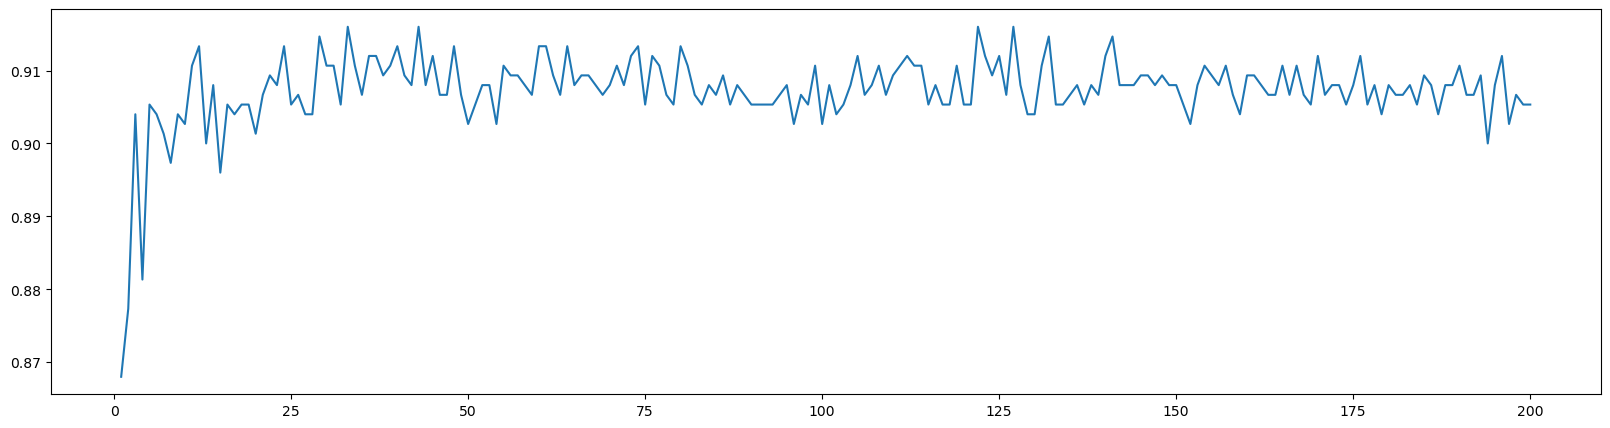

costing time:%.1f sec 210.10394763946533


In [53]:
from time import time
start=time()
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)#打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()
end=time()
print('costing time:%.1f sec',end-start)

### 可以看出,当较大时,精度会较大程度提升,但是,过大时就不会有太大变化,一直在某个区间上下波动,所以树的个数稍微大一点就可以

In [56]:
start=time()
end=time()
print('costing time:%.1f sec'%(end-start))

costing time:0.0 sec


## 特征重要性

In [58]:
#换一个特征较多的数据
wine = load_wine()
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

rfc = RandomForestClassifier(random_state=42)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
 
print("Random Forest:{}".format(score_r))

Random Forest:0.9814814814814815


In [60]:
feature_importance=[]

for name,score in zip(wine['feature_names'],rfc.feature_importances_):
    feature_importance.append([name,score])
print (feature_importance)

[['alcohol', 0.11617221031859933], ['malic_acid', 0.029491338199921877], ['ash', 0.009227556640078873], ['alcalinity_of_ash', 0.032131893456791294], ['magnesium', 0.03257048410073213], ['total_phenols', 0.0685490356308824], ['flavanoids', 0.18010621948785746], ['nonflavanoid_phenols', 0.009258402100192195], ['proanthocyanins', 0.02985390690504828], ['color_intensity', 0.19282296640046515], ['hue', 0.06527760237916133], ['od280/od315_of_diluted_wines', 0.08554998108820154], ['proline', 0.14898840329206806]]


In [62]:
feature_importance=np.array(feature_importance)
feature_importance[:,0]

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype='<U32')

In [84]:
feature=pd.DataFrame({'name':feature_importance[:,0],'score':feature_importance[:,1]})
feature.sort_values("score",ascending=True,inplace=True)
feature['score']=feature['score'].map(np.float64)

<function matplotlib.pyplot.show(close=None, block=None)>

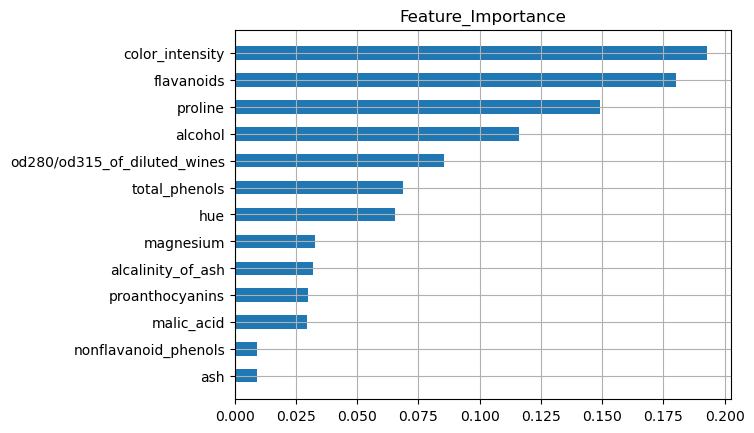

In [90]:
plt.bar(x=0,bottom=feature['name'],height=0.5,width=feature['score'],orientation="horizontal")
plt.grid()
plt.title('Feature_Importance')
plt.show